In [1]:
# Importing different libraries
#
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn import svm

In [2]:
# Importing the data
#
df = pd.read_spss('LEVEL02_1.sav')
df, meta = pyreadstat.read_sav('LEVEL02_1.sav')
type(df)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
# pd.set_option("max_rows", 30)
df

,cen_roun,fsu_no,round,sch_no,sample,sector,state,s_regon,distric,stratum,sub_stno,sub_rnd,fod_subr,sss,hhd_no,visit_no,level,filler,per_l2,rel,gender,age,edu,h_cb,h_po,nbfc,shg,non_in,lnd_l2,ag_l2,crd_l2,crd_u,e_walt,u_ewal,nsc,mlt
0,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,48.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,351750.0
1,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,45.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,351750.0
2,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,2.0,0.0,3.0,3.0,1.0,23.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,351750.0
3,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,2.0,19.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,351750.0
4,771.0,50030.0,77.0,182.0,1.0,1.0,24.0,241.0,25.0,25.0,31.0,2.0,2423.0,1.0,1.0,1.0,2.0,0.0,5.0,5.0,2.0,21.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,NaN,2.0,351750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319338,771.0,73999.0,77.0,182.0,1.0,2.0,3.0,32.0,7.0,7.0,1.0,1.0,321.0,6.0,2.0,1.0,2.0,0.0,5.0,6.0,1.0,16.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1825800.0
319339,771.0,73999.0,77.0,182.0,1.0,2.0,3.0,32.0,7.0,7.0,1.0,1.0,321.0,6.0,2.0,1.0,2.0,0.0,6.0,3.0,1.0,40.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,NaN,2.0,1825800.0
319340,771.0,73999.0,77.0,182.0,1.0,2.0,3.0,32.0,7.0,7.0,1.0,1.0,321.0,6.0,2.0,1.0,2.0,0.0,7.0,4.0,2.0,38.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,NaN,2.0,1825800.0
319341,771.0,73999.0,77.0,182.0,1.0,2.0,3.0,32.0,7.0,7.0,1.0,1.0,321.0,6.0,2.0,1.0,2.0,0.0,8.0,6.0,2.0,15.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1825800.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319343 entries, 0 to 319342
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cen_roun  319343 non-null  float64
 1   fsu_no    319343 non-null  float64
 2   round     319343 non-null  float64
 3   sch_no    319343 non-null  float64
 4   sample    319299 non-null  float64
 5   sector    319343 non-null  float64
 6   state     319343 non-null  float64
 7   s_regon   319343 non-null  float64
 8   distric   319343 non-null  float64
 9   stratum   319343 non-null  float64
 10  sub_stno  319343 non-null  float64
 11  sub_rnd   319343 non-null  float64
 12  fod_subr  300387 non-null  float64
 13  sss       319343 non-null  float64
 14  hhd_no    319343 non-null  float64
 15  visit_no  319343 non-null  float64
 16  level     319343 non-null  float64
 17  filler    319343 non-null  float64
 18  per_l2    319343 non-null  float64
 19  rel       319343 non-null  float64
 20  gend

In [4]:
# Description of the data
#
df.describe()

,cen_roun,fsu_no,round,sch_no,sample,sector,state,s_regon,distric,stratum,sub_stno,sub_rnd,fod_subr,sss,hhd_no,visit_no,level,filler,per_l2,rel,gender,age,edu,h_cb,h_po,nbfc,shg,non_in,lnd_l2,ag_l2,crd_l2,crd_u,e_walt,u_ewal,nsc,mlt
count,319343.0,319343.000000,319343.0,319343.0,319299.0,319343.000000,319343.000000,319343.000000,319343.000000,319343.000000,319343.000000,319343.000000,300387.000000,319343.000000,319343.000000,319343.0,319343.0,319343.0,319343.000000,319343.000000,319343.000000,319343.000000,319334.000000,319343.000000,319343.000000,319343.000000,319343.000000,319343.000000,319343.000000,73459.000000,218009.000000,71993.000000,218009.000000,7847.000000,319343.000000,3.193430e+05
mean,771.0,55785.664774,77.0,182.0,1.0,1.052260,16.659820,168.920953,16.866360,17.286526,26.517058,1.494446,1698.814060,3.781946,2.020301,1.0,2.0,0.0,3.226559,3.568223,1.488500,30.218567,3.421079,2.041996,1.973445,1.998184,1.955960,1.996828,1.769968,1.328741,1.669771,1.211021,1.964006,1.082707,2.023370,2.515901e+05
std,0.0,4993.241961,0.0,0.0,0.0,0.222552,9.244858,92.637204,14.698767,15.386911,10.020306,0.499970,950.078386,1.688528,1.372820,0.0,0.0,0.0,2.147415,1.996091,0.500413,19.824129,2.626920,1.382520,0.160778,0.042579,0.205185,0.056232,0.420853,0.469759,0.470297,0.408036,0.186275,0.275456,0.825487,4.544496e+05
min,771.0,50030.000000,77.0,182.0,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.0,2.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,771.0,52489.000000,77.0,182.0,1.0,1.000000,9.000000,93.000000,6.000000,6.000000,21.000000,1.000000,922.000000,3.000000,1.000000,1.0,2.0,0.0,2.000000,2.000000,1.000000,14.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.960000e+04
50%,771.0,55456.000000,77.0,182.0,1.0,1.000000,17.000000,171.000000,13.000000,13.000000,31.000000,1.000000,1821.000000,4.000000,2.000000,1.0,2.0,0.0,3.000000,4.000000,1.000000,27.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,7.052500e+04
75%,771.0,57395.000000,77.0,182.0,1.0,1.000000,24.000000,241.000000,23.000000,23.000000,33.000000,2.000000,2420.000000,5.000000,2.000000,1.0,2.0,0.0,4.000000,5.000000,2.000000,45.000000,5.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.772000e+05
max,771.0,73999.000000,77.0,182.0,1.0,2.000000,36.000000,362.000000,71.000000,99.000000,51.000000,2.000000,3613.000000,6.000000,12.000000,1.0,2.0,0.0,30.000000,9.000000,3.000000,110.000000,12.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16.000000,1.287405e+07


In [5]:
# Checking for missing observations in different features
#
df.isnull().sum()

cen_roun         0
fsu_no           0
round            0
sch_no           0
sample          44
             ...  
crd_u       247350
e_walt      101334
u_ewal      311496
nsc              0
mlt              0
Length: 36, dtype: int64

In [6]:
# Removing the irrelevant features
#
df.drop(['cen_roun','round','fsu_no','sch_no','sample','sector','state','s_regon','distric','stratum','sub_stno','sub_rnd','fod_subr','sss','hhd_no','visit_no','level','filler','per_l2','rel'], axis=1, inplace=True)
df.drop(['h_cb','h_po','nbfc','shg','non_in','lnd_l2','ag_l2','crd_l2','u_ewal','nsc','mlt'], axis=1, inplace=True)
pd.set_option('display.max_rows', 20)
df

,gender,age,edu,crd_u,e_walt
0,1.0,48.0,2.0,NaN,2.0
1,2.0,45.0,4.0,NaN,2.0
2,1.0,23.0,3.0,NaN,2.0
3,2.0,19.0,4.0,NaN,2.0
4,2.0,21.0,11.0,1.0,2.0
...,...,...,...,...,...
319338,1.0,16.0,5.0,NaN,NaN
319339,1.0,40.0,5.0,1.0,2.0
319340,2.0,38.0,3.0,1.0,2.0
319341,2.0,15.0,3.0,NaN,NaN


In [7]:
# Taking the count of the observations where age is less than 18 years
#
i = 0
gg = []
while i <319343 :
    if df.loc[i,'age'] < 18:
        gg.append(i)
    i +=1

In [8]:
# Replacing the missing features of credit card and e-wallet users below 18 to 0(Do not have a credit card or e-wallet)
#
for j in gg:
        df.loc[j,'crd_u'] = 0
        df.loc[j,'e_walt'] = 0
print(df)

        gender   age   edu  crd_u  e_walt
0          1.0  48.0   2.0    NaN     2.0
1          2.0  45.0   4.0    NaN     2.0
2          1.0  23.0   3.0    NaN     2.0
3          2.0  19.0   4.0    NaN     2.0
4          2.0  21.0  11.0    1.0     2.0
...        ...   ...   ...    ...     ...
319338     1.0  16.0   5.0    0.0     0.0
319339     1.0  40.0   5.0    1.0     2.0
319340     2.0  38.0   3.0    1.0     2.0
319341     2.0  15.0   3.0    0.0     0.0
319342     2.0  10.0   3.0    0.0     0.0

[319343 rows x 5 columns]


In [9]:
# Counting the missing observation after replacement
#
df.isnull().sum()

gender         0
age            0
edu            9
crd_u     146016
e_walt         0
dtype: int64

In [10]:
# Dropping the whole row wherever single observation is missing 
#
df = df.dropna()

In [11]:
# Final counting of the missing observations
#
df.isnull().sum()

gender    0
age       0
edu       0
crd_u     0
e_walt    0
dtype: int64

In [12]:
# The cleaned dataframe
#
df

,gender,age,edu,crd_u,e_walt
4,2.0,21.0,11.0,1.0,2.0
7,1.0,4.0,1.0,0.0,0.0
14,1.0,48.0,6.0,1.0,2.0
15,2.0,42.0,6.0,1.0,2.0
17,2.0,21.0,11.0,1.0,2.0
...,...,...,...,...,...
319338,1.0,16.0,5.0,0.0,0.0
319339,1.0,40.0,5.0,1.0,2.0
319340,2.0,38.0,3.0,1.0,2.0
319341,2.0,15.0,3.0,0.0,0.0


In [13]:
# Replacing the values 2 with 0
#
df.loc[df.crd_u == 2,'crd_u'] = 0
df.loc[df.e_walt == 2,'e_walt'] = 0
print(df)

        gender   age   edu  crd_u  e_walt
4          2.0  21.0  11.0    1.0     0.0
7          1.0   4.0   1.0    0.0     0.0
14         1.0  48.0   6.0    1.0     0.0
15         2.0  42.0   6.0    1.0     0.0
17         2.0  21.0  11.0    1.0     0.0
...        ...   ...   ...    ...     ...
319338     1.0  16.0   5.0    0.0     0.0
319339     1.0  40.0   5.0    1.0     0.0
319340     2.0  38.0   3.0    1.0     0.0
319341     2.0  15.0   3.0    0.0     0.0
319342     2.0  10.0   3.0    0.0     0.0

[173318 rows x 5 columns]


C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [14]:
# Creating the X (independent features) and Y (dependent features)
X = df.iloc[:,np.r_[0:3]].values
y = df.iloc[:,np.r_[3]].values # 3 for credit card and 4 for e-walllet

In [15]:
X

array([[ 2., 21., 11.],
       [ 1.,  4.,  1.],
       [ 1., 48.,  6.],
       ...,
       [ 2., 38.,  3.],
       [ 2., 15.,  3.],
       [ 2., 10.,  3.]])

In [16]:
y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [17]:
# Creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [18]:
print('X_train:\n',X_train, '\n Y_train:\n',y_train,'\n X_test:\n',X_test, '\n Y_test:\n',y_test )

X_train:
 [[ 1. 15.  4.]
 [ 1. 30.  5.]
 [ 1.  8.  2.]
 ...
 [ 1.  3.  1.]
 [ 2.  4.  1.]
 [ 1. 13.  4.]] 
 Y_train:
 [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 
 X_test:
 [[ 1. 58.  1.]
 [ 2. 12.  4.]
 [ 1. 16.  5.]
 ...
 [ 1.  5.  2.]
 [ 1. 48. 11.]
 [ 1. 23.  5.]] 
 Y_test:
 [[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [19]:
print('X_train:\n',X_train,'\n \n X_test:\n',X_test)

X_train:
 [[ 1. 15.  4.]
 [ 1. 30.  5.]
 [ 1.  8.  2.]
 ...
 [ 1.  3.  1.]
 [ 2.  4.  1.]
 [ 1. 13.  4.]] 
 
 X_test:
 [[ 1. 58.  1.]
 [ 2. 12.  4.]
 [ 1. 16.  5.]
 ...
 [ 1.  5.  2.]
 [ 1. 48. 11.]
 [ 1. 23.  5.]]


In [20]:
# Standardizing the data
#
ss=StandardScaler()
X_train_st=ss.fit_transform(X_train)
X_test_st=ss.fit_transform(X_test)

In [21]:
'''Decision Tree Classifier'''

'Decision Tree Classifier'

In [22]:
# Training Decision tree model
DTClassifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
# Making predictions for the testing values
y_pred = DTClassifier.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 1.])

In [24]:
# Accuracy of the model
#
print('The accuracy of decision tree is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is:  0.9103681052388646


In [25]:
# Confusion Matrix
print(confusion_matrix(y_pred, y_test))

[[20460   331]
 [ 2776 11097]]


In [26]:
'''Naive Bayes Classifier'''

'Naive Bayes Classifier'

In [27]:
# Training the model
NBClassifier=GaussianNB()
NBClassifier.fit(X_train_st, y_train.ravel())

GaussianNB()

In [28]:
# Making predictions for the testing values
y_pred1 = NBClassifier.predict(X_test)
y_pred1

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:
# Accuracy of the model
#
print('The accuracy of Naive baise is: ', metrics.accuracy_score(y_pred1, y_test))

The accuracy of Naive baise is:  0.3400934687283637


In [30]:
# Confusion Matrix
print(confusion_matrix(y_pred1, y_test))

[[  361     0]
 [22875 11428]]


In [31]:
'''Multivariate Logistic Regression'''

'Multivariate Logistic Regression'

In [32]:
logit = sm.Logit(y, sm.add_constant(X)).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.309569
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.511      
Dependent Variable: y                AIC:              107315.6331
Date:               2021-10-27 00:07 BIC:              107355.8846
No. Observations:   173318           Log-Likelihood:   -53654.    
Df Model:           3                LL-Null:          -1.0963e+05
Df Residuals:       173314           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -4.3895     0.0328   -133.8970   0.0000   -4.4537   -4.3252
x1       -0.6203     0.0162    -38.2777   0.0000   -0.6520   -0.5885
x2        0.1010     0.0006    181.9335   0.0000    0.0999    0.1021
x3        0.5078     0.0040    126.8635   0.0000    0.4999    0.5156
==================================================================

"""

In [33]:
# Training the model
logistic1 = LogisticRegression()
logistic1.fit(X_train,y_train.ravel())
predict1 = logistic1.predict(X_test)
predict1

array([1., 0., 0., ..., 0., 1., 0.])

In [34]:
# Accuracy of the model
#
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(predict1,y_test))

The accuracy of Logistic Regression is:  0.8715381952457881


In [35]:
# Confusion Matrix
confusion_matrix(predict1, y_test)

array([[21271,  2488],
       [ 1965,  8940]], dtype=int64)

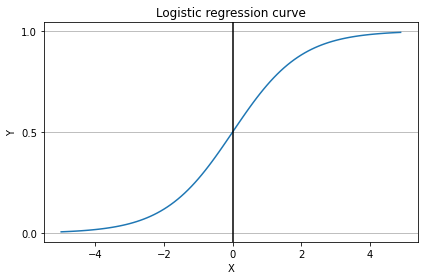

In [36]:
 
# Sigmoid function
#
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Creating sample Z points
#
z = np.arange(-5, 5, 0.1)


# Plotting the Sigmoid function

plt.plot(z, sigmoid(z))
plt.axvline(0.0, color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
plt.title('Logistic regression curve')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

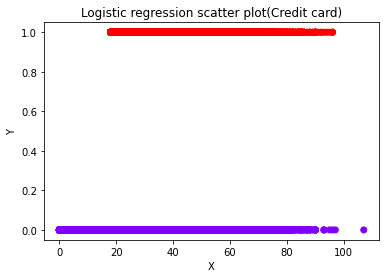

In [37]:
# Logistic regression scatter plot from the data
#
plt.scatter(X[:,1], y, c=y, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic regression scatter plot(Credit card)')
plt.show()

In [38]:
'''Random Forest Classifier'''

'Random Forest Classifier'

In [39]:
# Training the model
model = RandomForestClassifier(n_estimators=10, random_state=25)
model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=25)

In [40]:
prediction = model.predict(X_test)
prediction

array([1., 0., 0., ..., 0., 1., 1.])

In [41]:
# Accuracy of the model
#
print('The accuracy of Random Forest Classifier is: ', metrics.accuracy_score(prediction,y_test))

The accuracy of Random Forest Classifier is:  0.9112047080544657


In [42]:
# Confusion Matrix
#
confusion_matrix(prediction, y_test)

array([[20450,   292],
       [ 2786, 11136]], dtype=int64)

In [43]:
# Creating a new dataframe with only independent features; it will be used for measuring the prominent feature
#
G = df.drop(['crd_u', 'e_walt'], axis=1)
G

# Prominent feature according to Random forest algorithm
#
feature_list = list(G.columns)
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending=False)
print(feature_imp)

age       0.786825
edu       0.188612
gender    0.024563
dtype: float64


In [44]:
'''Bagging'''

'Bagging'

In [45]:
# Training the model
#
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train,y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [46]:
# Testing the model
#
bg.score(X_test,y_test)

0.9118682206323563

In [47]:
'''Boosting AdaBoost'''

'Boosting AdaBoost'

In [48]:
# Training the model
#
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(X_train,y_train.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=5)

In [49]:
# Training the model
#
adb.score(X_test,y_test)

0.9110893145626586

In [50]:
'''Voting Classifier'''

'Voting Classifier'

In [51]:
# logistic1
# DTClassifier
svm = SVC(kernel = 'poly', degree = 2 )

In [52]:
# Training the model
#
evc = VotingClassifier( estimators= [('logistic1',logistic1),('DTClassifier',DTClassifier),('svm',svm)], voting = 'hard')
evc.fit(X_train,y_train.ravel())

VotingClassifier(estimators=[('logistic1', LogisticRegression()),
                             ('DTClassifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [53]:
# Testing the model
#
evc.score(X_test, y_test)

0.8816928225248096

In [54]:
'''SVM - Linear'''

'SVM - Linear'

In [55]:
# Training the model
#
classifier = SVC(kernel ='linear', gamma='auto', C=2)
classifier = SVC(probability=True)
classifier.fit(X_train, y_train.ravel())


SVC(probability=True)

In [56]:
# Testing the model
#
y_predict = classifier.predict(X_test)
print('The accuracy of Support Vector Classifier is: ', metrics.accuracy_score(y_predict,y_test))

The accuracy of Support Vector Classifier is:  0.9080025386568198


In [57]:
'''ROC(receiver operating characteristic curve) AUC(area under the curve) method'''

'ROC(receiver operating characteristic curve) AUC(area under the curve) method'

In [58]:
# Calculating the probabilities of different models
#

r_prob = [0 for _ in range(len(y_test))]
rf_prob = model.predict_proba(X_test)
nb_prob = NBClassifier.predict_proba(X_test)
dt_prob = DTClassifier.predict_proba(X_test)
log_prob = logistic1.predict_proba(X_test)
bag_prob = bg.predict_proba(X_test)
boost_prob = adb.predict_proba(X_test)
svm_prob = classifier.predict_proba(X_test)
# voc_prob = evc.predict_proba(X_test)

rf_prob = rf_prob[:,1]
nb_prob = nb_prob[:,1]
dt_prob = dt_prob[:,1]
log_prob = log_prob[:,1]
bag_prob = bag_prob[:,1]
boost_prob = boost_prob[:,1]
svm_prob = svm_prob[:,1]
# voc_prob = voc_prob[:,1]

In [59]:


r_auc = roc_auc_score(y_test, r_prob)
rf_auc = roc_auc_score(y_test, rf_prob)
nb_auc = roc_auc_score(y_test, nb_prob)
dt_auc = roc_auc_score(y_test, dt_prob)
log_auc = roc_auc_score(y_test, log_prob)
bag_auc = roc_auc_score(y_test, bag_prob)
boost_auc = roc_auc_score(y_test, boost_prob)
svm_auc = roc_auc_score(y_test, svm_prob)
# voc_auc = roc_auc_score(y_test, voc_prob)

print('Random (chance) prediction: AUROC = %.3f' % (r_auc))
print('Random forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Decision tree: AUROC = %.3f' % (dt_auc))
print('Logistic regression: AUROC = %.3f' % (log_auc))
print('Bagging: AUROC = %.3f' % (bag_auc))
print('Boosting: AUROC = %.3f' % (boost_auc))
print('Support vector classifier: AUROC = %.3f' % (svm_auc))
# print('Voting classifier: AUROC = %.3f' % (voc_auc))

Random (chance) prediction: AUROC = 0.500
Random forest: AUROC = 0.959
Naive Bayes: AUROC = 0.725
Decision tree: AUROC = 0.959
Logistic regression: AUROC = 0.943
Bagging: AUROC = 0.960
Boosting: AUROC = 0.960
Support vector classifier: AUROC = 0.949


In [60]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob)
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_prob)
boost_fpr, boost_tpr, _ = roc_curve(y_test, boost_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
# voc_fpr, voc_tpr, _ = roc_curve(y_test, voc_prob)

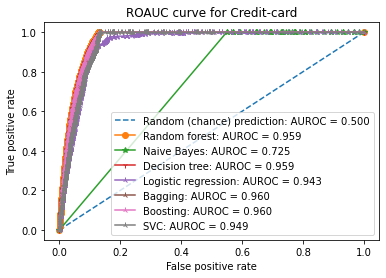

In [61]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(rf_fpr, rf_tpr, marker='o', label='Random forest: AUROC = %.3f' % (rf_auc))
plt.plot(nb_fpr, nb_tpr, marker='*', label='Naive Bayes: AUROC = %.3f' % (nb_auc))
plt.plot(dt_fpr, dt_tpr, marker='1', label='Decision tree: AUROC = %.3f' % (dt_auc))
plt.plot(log_fpr, log_tpr, marker='2', label='Logistic regression: AUROC = %.3f' % (log_auc))
plt.plot(bag_fpr, bag_tpr, marker='2', label='Bagging: AUROC = %.3f' % (bag_auc))
plt.plot(boost_fpr, boost_tpr, marker='2', label='Boosting: AUROC = %.3f' % (boost_auc))
plt.plot(svm_fpr, svm_tpr, marker='2', label='SVC: AUROC = %.3f' % (svm_auc))
# plt.plot(voc_fpr, log_tpr, marker='2', label='Voting classifier: AUROC = %.3f' % (voc_auc))
plt.title('ROAUC curve for Credit-card')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

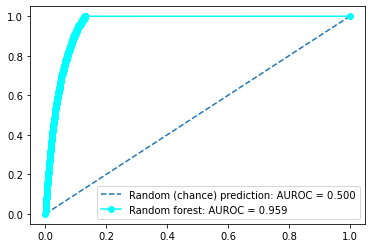

In [62]:
# Random forest ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(rf_fpr, rf_tpr, marker='o',color ='cyan' ,label='Random forest: AUROC = %.3f' % (rf_auc))
plt.legend()
plt.show()

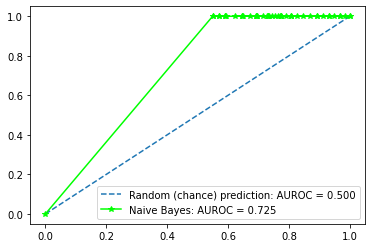

In [63]:
# Naive bayes ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(nb_fpr, nb_tpr, marker='*',color ='lime', label='Naive Bayes: AUROC = %.3f' % (nb_auc))
plt.legend()

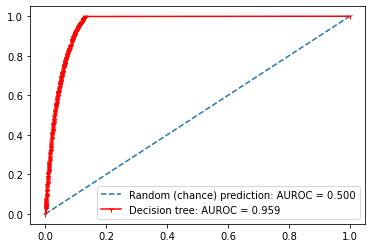

In [64]:
# Decision tree ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(dt_fpr, dt_tpr, marker='1',color ='red', label='Decision tree: AUROC = %.3f' % (dt_auc))
plt.legend()

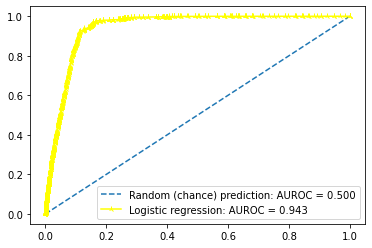

In [65]:
# Logistic regression ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(log_fpr, log_tpr, marker='2',color ='yellow', label='Logistic regression: AUROC = %.3f' % (log_auc))
plt.legend()

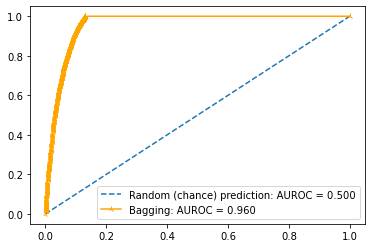

In [66]:
# Bagging ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(bag_fpr, bag_tpr, marker='2',color ='orange', label='Bagging: AUROC = %.3f' % (bag_auc))
plt.legend()

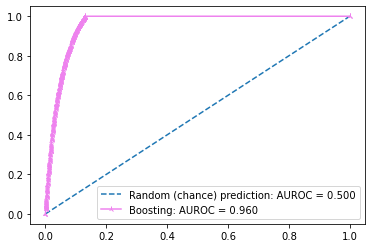

In [67]:
# Boosting ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(boost_fpr, boost_tpr, marker='2',color ='violet', label='Boosting: AUROC = %.3f' % (boost_auc))
plt.legend()

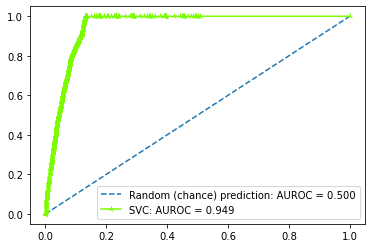

In [68]:
# SVC ROAUC plot
#
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) prediction: AUROC = %.3f' % (r_auc))
plt.plot(svm_fpr, svm_tpr, marker='2', color = 'lawngreen', label='SVC: AUROC = %.3f' % (svm_auc))
plt.legend()
plt.show()